In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
import torch.nn as nn
import torch
import sys
import os
import yaml
import random
sys.path.append(r"C:\Users\Vishi\VSC Codes\CheXzero Finetune\VLP-Seminar\Finetune")
from datasets.cls_dataset import RSNAImageClsDataset, ChexPertImageClsDataset
from datasets.data_module import DataModule
from datasets.transforms import DataTransforms
from methods.cls_model import FinetuneClassifier



c:\Users\Vishi\miniconda3\envs\cheXzero\Lib\site-packages\timm\models\registry.py:4: FutureWarning: Importing from timm.models.registry is deprecated, please import via timm.models
  warnings.warn(f"Importing from {__name__} is deprecated, please import via timm.models", FutureWarning)
c:\Users\Vishi\miniconda3\envs\cheXzero\Lib\site-packages\timm\models\layers\__init__.py:48: FutureWarning: Importing from timm.models.layers is deprecated, please import via timm.layers
  warnings.warn(f"Importing from {__name__} is deprecated, please import via timm.layers", FutureWarning)
c:\Users\Vishi\miniconda3\envs\cheXzero\Lib\site-packages\timm\models\helpers.py:7: FutureWarning: Importing from timm.models.helpers is deprecated, please import via timm.models
  warnings.warn(f"Importing from {__name__} is deprecated, please import via timm.models", FutureWarning)


In [2]:
def load_config(config_path):
    with open(config_path, "r") as file:
        config = yaml.safe_load(file)
    return config
config = load_config(r"C:\Users\Vishi\VSC Codes\CheXzero Finetune\VLP-Seminar\configs\rsna_test.yaml")

In [3]:
hparams = {'data_pct': 1, 'batch_size': 48, 'num_workers': 4}

In [4]:
ckpt_path = r'C:\Users\Vishi\VSC Codes\CheXzero Finetune\VLP-Seminar\data\ckpts\FinetuneCLS\rsna\2025_01_11_11_40_05\epoch=7-step=144.ckpt'

In [5]:
datamodule = DataModule(dataset=RSNAImageClsDataset, 
                        config=config, collate_fn=None,
                        transforms=DataTransforms, data_pct=hparams['data_pct'],
                        batch_size=hparams['batch_size'], num_workers=hparams['num_workers']).test_dataloader()



Dataset size of split test: 4003


In [6]:
datamodule

In [7]:
dataset = RSNAImageClsDataset(config=config, data_pct=hparams['data_pct'])

Dataset size of split train: 18678


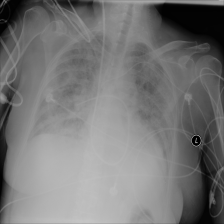

In [8]:
img_id = random.randint(0, len(dataset))
dataset[img_id][0]

In [10]:
from methods.cls_model import FinetuneClassifier
import pytorch_lightning as pl

# Load pre-trained model
model = FinetuneClassifier(config)
checkpoint = torch.load(ckpt_path, map_location=torch.device('cpu'))
# model.load_state_dict(checkpoint['state_dict'], strict=False) use with finetuned ckpts
model.load_state_dict(checkpoint, strict=False) # use with non finetuned ckpts
model.eval()  # Set model to evaluation mode
trainer = pl.Trainer(accelerator='cpu')

results = trainer.test(model, datamodule)

C:\Users\Vishi\AppData\Local\Temp\ipykernel_15092\695651760.py:6: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(ckpt_path, map_location=torch.device(

Dataset size of split test: 187



Detected KeyboardInterrupt, attempting graceful shutdown ...


NameError: name 'exit' is not defined